# Company: Warner bros

# News Sentiment Analysis

In [ ]:
!pip install requests
!pip install pandas
!pip install matplotlib
!pip install wordcloud
!pip install nltk
!pip install scikit-learn
!pip install tensorflow
!pip install keras
!pip install prophet
!pip install seaborn

In [3]:
import requests
URL = 'https://www.theguardian.com/film/warner-bros'
page = requests.get(URL)

In [ ]:
import pandas as pd
from datetime import datetime

meta = []
for i in range(1, 990):
    currURL = URL + "?page=" + str(i)
    page = requests.get(currURL)
    soup = BeautifulSoup(page.content, 'html.parser')
    results = soup.find_all("div", {"class": "fc-container__inner"})

    for result in results:
        days = result.find_all("div", {"class": "fc-item__container"})
        for day in days:
            arr = []
            timestamp_element = day.find("time")
            timestamp = timestamp_element["datetime"]
            
            # Convert the timestamp to a datetime object
            date_obj = datetime.strptime(timestamp, "%Y-%m-%dT%H:%M:%S%z")
            
            # Extract the day, month, and year from the datetime object
            date_str = date_obj.strftime("%d %b %Y")
            
            headline_element = day.find("span", class_="js-headline-text")
            subtext_element = day.find("div", class_="fc-item__kicker")
            
            headline = headline_element.get_text().strip()
            subtext = subtext_element.get_text().strip() if subtext_element else None
            
            if subtext:
                headline = f"{headline} - {subtext}"
            
            arr.append(date_str)
            arr.append(headline)
            
            meta.append(arr)

df = pd.DataFrame(meta, columns=["Time", "Headlines"])

# Remove duplicate rows based on both columns
df = df.drop_duplicates()

# Sort the DataFrame by the "Time" column in descending order
df = df.sort_values(by="Time", ascending=False)

# Save the sorted DataFrame to a CSV file
df.to_csv("WarnerBros_News.csv", index=False)


# Word cloud for News

C:\Users\sheet\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


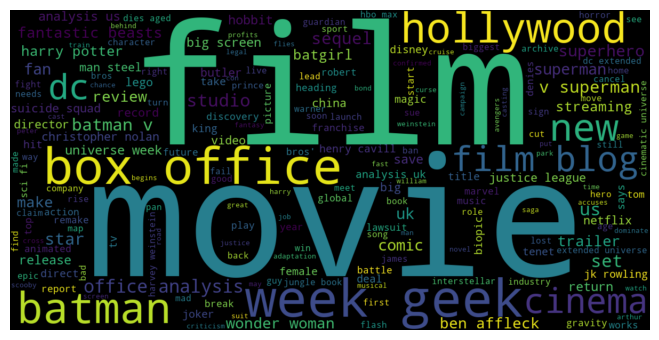

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import pandas as pd
from datetime import datetime

data = pd.read_csv('NewsSentiments_WBD.csv', encoding='latin-1')

# Combine all the headlines into a single string
text = ' '.join(data['Headlines'].astype(str).tolist())

# Remove non-ASCII characters
text = ''.join(character for character in text if ord(character) < 128)


# Adding more stop words
additional_stop_words = ['Warner','Bros']

#Converting additional words to lower case
additional_stop_words_lower = [word.lower() for word in additional_stop_words]

additional_stop_words_lower

# Remove stopwords
stop_words = set(stopwords.words('english') + additional_stop_words + additional_stop_words_lower)
tokens = text.lower().split()
filtered_tokens = [token for token in tokens if token not in stop_words]
filtered_text = ' '.join(filtered_tokens)

# Generate word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='Black').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(10, 3.5), tight_layout=True)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Wordcloud for news with Negative sentiments

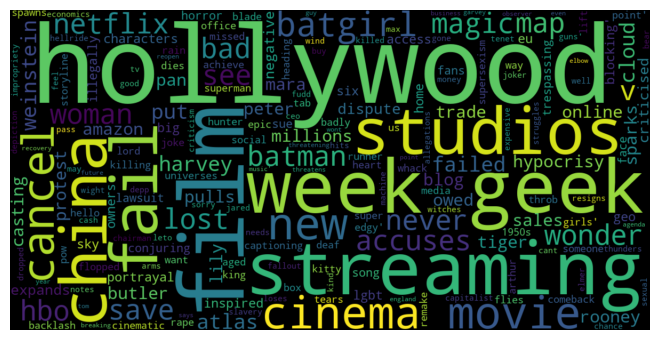

In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import pandas as pd

data = pd.read_csv('NewsSentiments_WBD.csv', encoding='latin-1')

# Filter out negative headlines
negative_headlines = data[data['Actual Sentiment'] == 'Negative']['Headlines'].astype(str).tolist()

# Combine all the negative headlines into a single string
text = ' '.join(negative_headlines)

# Remove non-ASCII characters
text = ''.join(character for character in text if ord(character) < 128)


# Adding more stop words
additional_stop_words = ['Warner','Bros']

# Converting additional words to lower case
additional_stop_words_lower = [word.lower() for word in additional_stop_words]

# Remove stopwords
stop_words = set(stopwords.words('english') + additional_stop_words + additional_stop_words_lower)
tokens = text.lower().split()
filtered_tokens = [token for token in tokens if token not in stop_words]
filtered_text = ' '.join(filtered_tokens)

# Generate word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='Black').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(10, 3.5), tight_layout=True)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


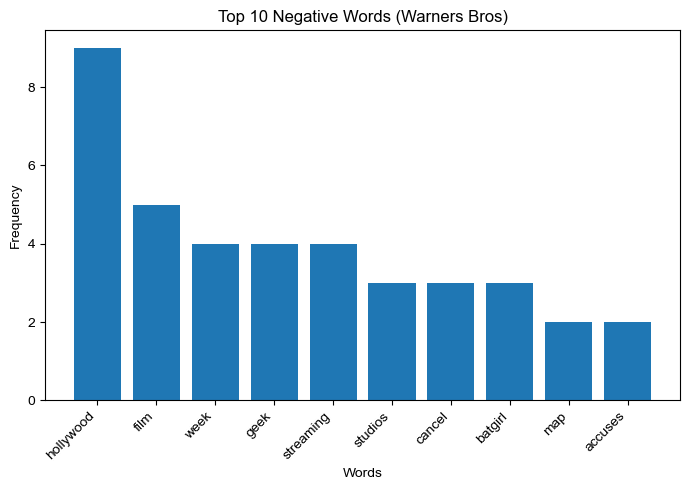

In [7]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import pandas as pd
from collections import Counter
import re

data = pd.read_csv('NewsSentiments_WBD.csv', encoding='latin-1')

# Filter out negative headlines
negative_headlines = data[data['Actual Sentiment'] == 'Negative']['Headlines'].astype(str).tolist()

# Combine all the negative headlines into a single string
text = ' '.join(negative_headlines)

# Remove non-ASCII characters
text = ''.join(character for character in text if ord(character) < 128)


# Adding more stop words
additional_stop_words = ['Warner','Bros','v']

# Converting additional words to lower case
additional_stop_words_lower = [word.lower() for word in additional_stop_words]

# Remove stopwords
stop_words = set(stopwords.words('english') + additional_stop_words + additional_stop_words_lower)

# Split text into words and clean them
tokens = re.findall(r'\b\w+\b', text.lower())
filtered_tokens = [token for token in tokens if token not in stop_words]

# Get top 20 words with negative sentiments
word_counts = Counter(filtered_tokens)
top_10_negative_words = word_counts.most_common(10)

# Extract words and counts for the histogram
words, counts = zip(*top_10_negative_words)

# Create a histogram with Arial font
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'

plt.figure(figsize=(7, 5))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Negative Words (Warners Bros)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


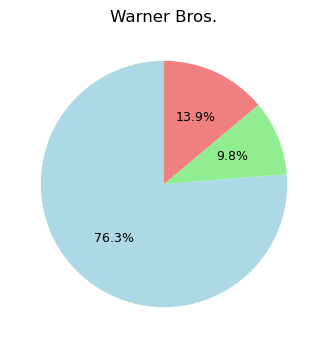

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('NewsSentiments_WBD.csv', encoding='latin-1')

# Get unique sentiment labels
sentiment_labels = data['Actual Sentiment'].unique()

# Define custom colors for sentiment labels
colors = {'Negative': 'lightcoral', 'Positive': 'lightgreen', 'Neutral': 'lightblue'}

# Calculate the percentage of each sentiment label
percentage_values = [(data['Actual Sentiment'] == label).mean() * 100 for label in sentiment_labels]

# Plot Sentiment Pie Chart with custom colors
plt.figure(figsize=(6, 4))
_, texts, _ = plt.pie(percentage_values, autopct='%1.1f%%', startangle=90,textprops={'fontsize': 9}, colors=[colors[label] for label in sentiment_labels])
plt.title('Warner Bros.')


plt.show()


# LSTM applied on WBD Base data

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


df = pd.read_csv('WBD.csv')

# Using MinMaxScaler to scale the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop('Date', axis=1))

# Create sequences of 60 days and predict the next day
X = []
y = []

for i in range(60, len(scaled_data) - 30): #-30 is used since we are predicting price for last 30 days
    X.append(scaled_data[i-60:i])
    y.append(np.where(scaled_data[i][-2] > scaled_data[i-1][-2], 1, 0))  

X, y = np.array(X), np.array(y)

# Define the LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=30, batch_size=32)

# Prepare the test data
X_test = []
y_test = []

for i in range(len(scaled_data) - 30, len(scaled_data)):
    X_test.append(scaled_data[i-60:i])
    y_test.append(np.where(scaled_data[i][-2] > scaled_data[i-1][-2], 1, 0))

X_test, y_test = np.array(X_test), np.array(y_test)

# Predicting
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).ravel()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Epoch 1/30
80/80 [==============================] - 10s 54ms/step - loss: 0.6936 - accuracy: 0.5022
Epoch 2/30
80/80 [==============================] - 4s 49ms/step - loss: 0.6931 - accuracy: 0.5104
Epoch 3/30
80/80 [==============================] - 4s 48ms/step - loss: 0.6931 - accuracy: 0.5120
Epoch 4/30
80/80 [==============================] - 4s 47ms/step - loss: 0.6928 - accuracy: 0.5194
Epoch 5/30
80/80 [==============================] - 4s 50ms/step - loss: 0.6930 - accuracy: 0.5076
Epoch 6/30
80/80 [==============================] - 4s 52ms/step - loss: 0.6932 - accuracy: 0.5065
Epoch 7/30
80/80 [==============================] - 4s 51ms/step - loss: 0.6927 - accuracy: 0.5198
Epoch 8/30
80/80 [==============================] - 4s 47ms/step - loss: 0.6929 - accuracy: 0.5163
Epoch 9/30
80/80 [==============================] - 3s 43ms/step - loss: 0.6928 - accuracy: 0.5159
Epoch 10/30
80/80 [==============================] - 3s 43ms/step - loss: 0.6928 - accuracy: 0.5112
Epoch 11

# LSTM applied on WBD Technical Indicators

Epoch 1/10
171/171 [==============================] - 10s 28ms/step - loss: 0.6511 - accuracy: 0.6272
Epoch 2/10
171/171 [==============================] - 5s 27ms/step - loss: 0.6037 - accuracy: 0.6895
Epoch 3/10
171/171 [==============================] - 5s 28ms/step - loss: 0.3922 - accuracy: 0.8307
Epoch 4/10
171/171 [==============================] - 5s 27ms/step - loss: 0.2962 - accuracy: 0.8734
Epoch 5/10
171/171 [==============================] - 6s 35ms/step - loss: 0.2561 - accuracy: 0.8879
Epoch 6/10
171/171 [==============================] - 6s 37ms/step - loss: 0.2569 - accuracy: 0.8906
Epoch 7/10
171/171 [==============================] - 6s 35ms/step - loss: 0.2404 - accuracy: 0.8985
Epoch 8/10
171/171 [==============================] - 6s 33ms/step - loss: 0.2497 - accuracy: 0.8898
Epoch 9/10
171/171 [==============================] - 5s 32ms/step - loss: 0.2410 - accuracy: 0.8977
Epoch 10/10
1/1 [==============================] - 1s 1s/step
Accuracy: 0.9
Precision: 0.8

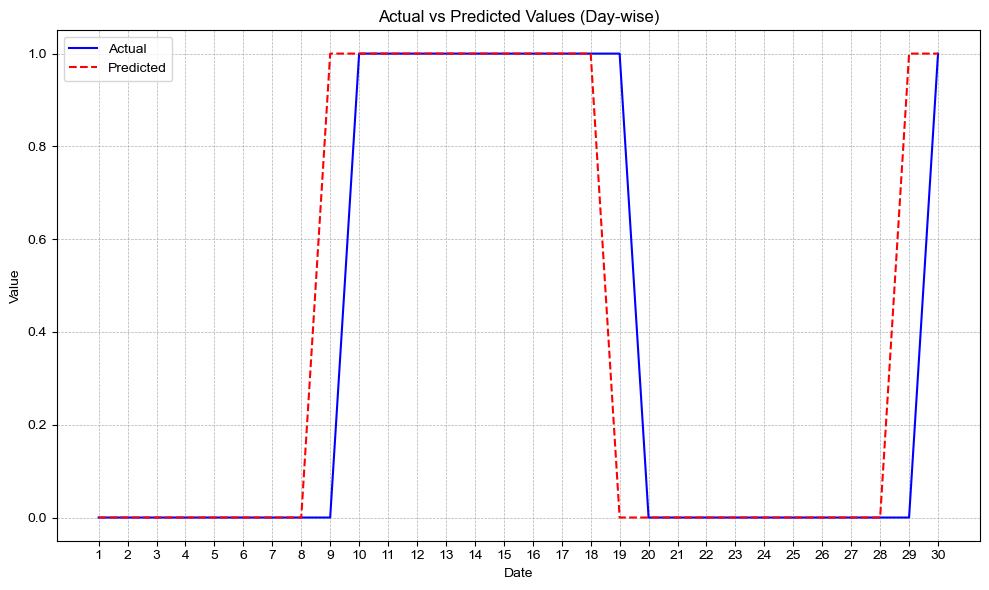

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


df = pd.read_csv('WBD_TechIndicators.csv')


scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop('Date', axis=1))

# Create sequences of 60 days and predict the next day
X = []
y = []

for i in range(60, len(scaled_data) - 30):  
    X.append(scaled_data[i-60:i])
    y.append(np.where(scaled_data[i][-2] > scaled_data[i-1][-2], 1, 0))  
    
X, y = np.array(X), np.array(y)


# Define the LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, batch_size=15)

# Prepare the test data for the last 30 days
X_test = []

for i in range(len(scaled_data) - 30, len(scaled_data)):
    X_test.append(scaled_data[i-60:i])
 

X_test = np.array(X_test)

# Predicting
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int).ravel()


# Generate y_test
y_test = []
for i in range(len(scaled_data) - 30, len(scaled_data)):
    y_test.append(np.where(scaled_data[i][-2] > scaled_data[i-1][-2], 1, 0))

y_test = np.array(y_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

days = range(1, len(y_test) + 1)

plt.figure(figsize=(10,6))
plt.title('Actual vs Predicted Values (Day-wise)')
plt.plot(days, y_test, color='blue', label='Actual')
plt.plot(days, y_pred_binary, color='red', linestyle='dashed', label='Predicted')

plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(days)  
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# LSTM applied on WBD News sentiments

Epoch 1/50
8/8 [==============================] - 7s 182ms/step - loss: 0.6930 - accuracy: 0.4825 - val_loss: 0.6939 - val_accuracy: 0.3667
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6921 - accuracy: 0.5132 - val_loss: 0.6931 - val_accuracy: 0.3667
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6911 - accuracy: 0.5263 - val_loss: 0.6919 - val_accuracy: 0.4000
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6894 - accuracy: 0.5526 - val_loss: 0.6899 - val_accuracy: 0.6333
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6864 - accuracy: 0.5702 - val_loss: 0.6869 - val_accuracy: 0.6667
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6810 - accuracy: 0.5482 - val_loss: 0.6818 - val_accuracy: 0.6667
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6710 - accuracy: 0.5482 - val_loss: 0.6721 - val_accuracy: 0.6667
Epoch 8/50
8/8 [================

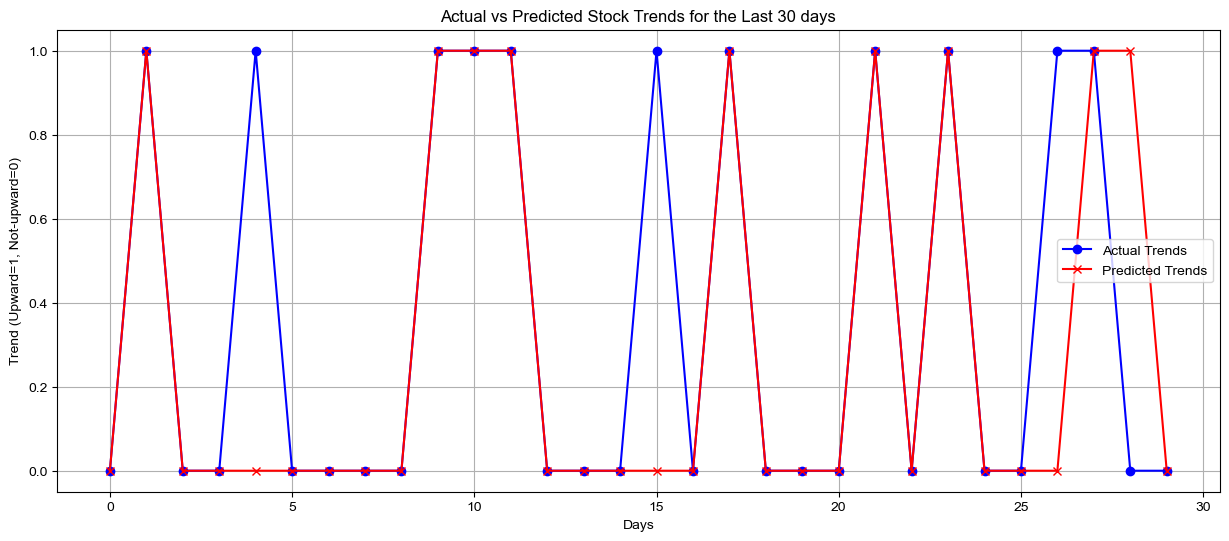

Accuracy: 0.8667
Precision: 0.8889
Recall: 0.7273
F1 Score: 0.8000


In [7]:
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score

df = pd.read_csv('Combined_WBD_filled.csv')

df = df.dropna(subset=['Actual Sentiment'])

# One-Hot Encoding the 'Actual Sentiment' column
df = pd.concat([df, pd.get_dummies(df['Actual Sentiment'], prefix='Sentiment')], axis=1)


# Dropping the 'Date' column
df = df.drop(['Date', 'Actual Sentiment'], axis=1)

# Creating a 'Trend' column for predicting stock market trends
df['Trend'] = df['Close'].pct_change().apply(lambda x: 1 if x > 0 else 0)
df = df.dropna()

# Define features (excluding the target variable 'Trend') and target variable
features = df.drop('Trend', axis=1)
target = df['Trend']

# Splitting the dataset
split_point = len(df) - 30
X_train, X_test = features.iloc[:split_point], features.iloc[split_point:]
y_train, y_test = target.iloc[:split_point], target.iloc[split_point:]


# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1, shuffle=False)


# Make predictions on the test set
predicted_trends = model.predict(X_test)
predicted_trends = [1 if x[0] > 0.5 else 0 for x in predicted_trends]  # Threshold the predictions

# Visualization: Actual vs Predicted Trends for the Last 30 days
plt.figure(figsize=(15, 6))

plt.plot(y_test.reset_index(drop=True), color='blue', label='Actual Trends', marker='o')
plt.plot(predicted_trends, color='red', label='Predicted Trends', marker='x')
plt.title('Actual vs Predicted Stock Trends for the Last 30 days')
plt.xlabel('Days')
plt.ylabel('Trend (Upward=1, Not-upward=0)')
plt.legend()
plt.grid(True)
plt.show()


# Calculate Accuracy, Precision, Recall, and F1 score
accuracy = accuracy_score(y_test, predicted_trends)
precision = precision_score(y_test, predicted_trends)
recall = recall_score(y_test, predicted_trends)
f1 = f1_score(y_test, predicted_trends)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Logistic Regression applied on WBD Base Data

Accuracy: 0.43333333333333335
Precision: 0.6666666666666666
Recall: 0.21052631578947367
F1 score: 0.32


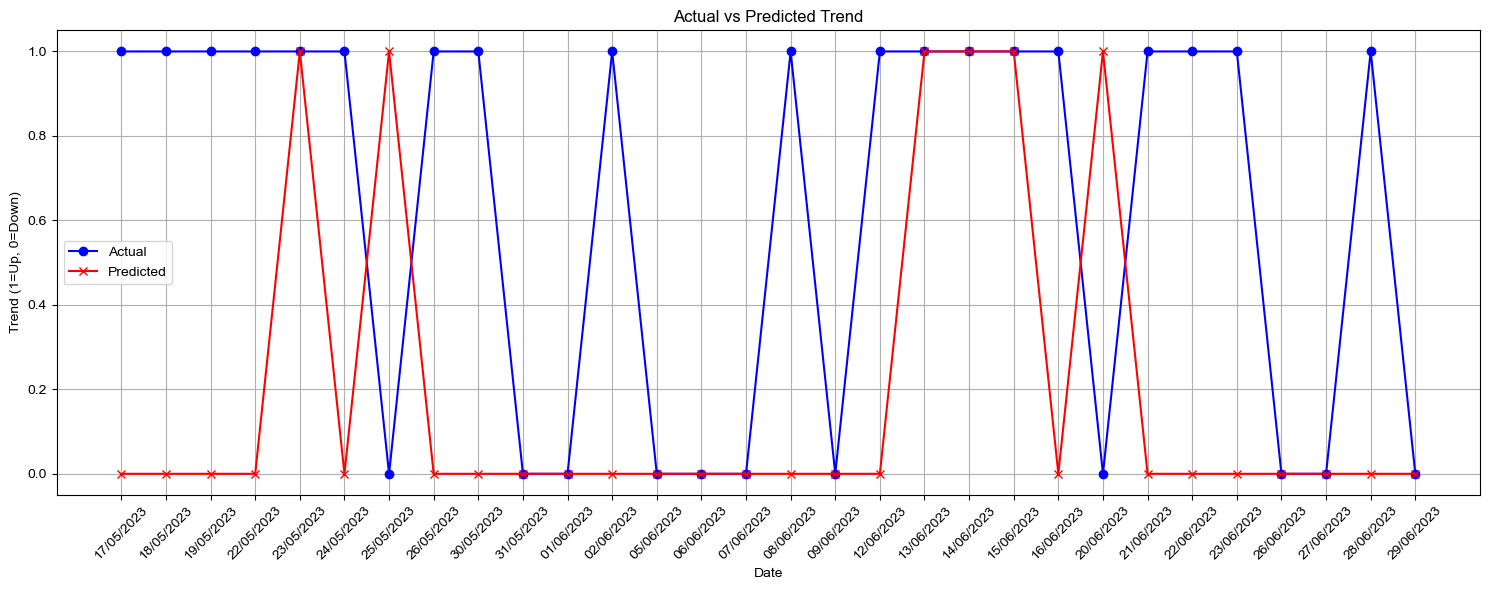

In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('WBD.csv')

df['Trend'] = df['Close'].shift(-1) < df['Close']
df['Trend'] = df['Trend'].astype(int)
df.dropna(inplace=True)

features = ['Open','Close','High','Low']

# Separate the last 30 days for testing
train_df = df.iloc[:-30]
test_df = df.iloc[-30:]

X_train = train_df[features]
y_train = train_df['Trend']

X_test = test_df[features]
y_test = test_df['Trend']

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

# Plotting the graph
plt.figure(figsize=(15, 6))
dates = test_df['Date']

plt.plot(dates, y_test, color='blue', label='Actual', marker='o')
plt.plot(dates, y_pred, color='red', label='Predicted', marker='x')

plt.title('Actual vs Predicted Trend')
plt.xlabel('Date')
plt.ylabel('Trend (1=Up, 0=Down)')
plt.xticks(dates, rotation=45)  

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Logistic Regression applied on WBD Technical Indicators

Accuracy: 0.5666666666666667
Precision: 0.75
Recall: 0.47368421052631576
F1 score: 0.5806451612903226


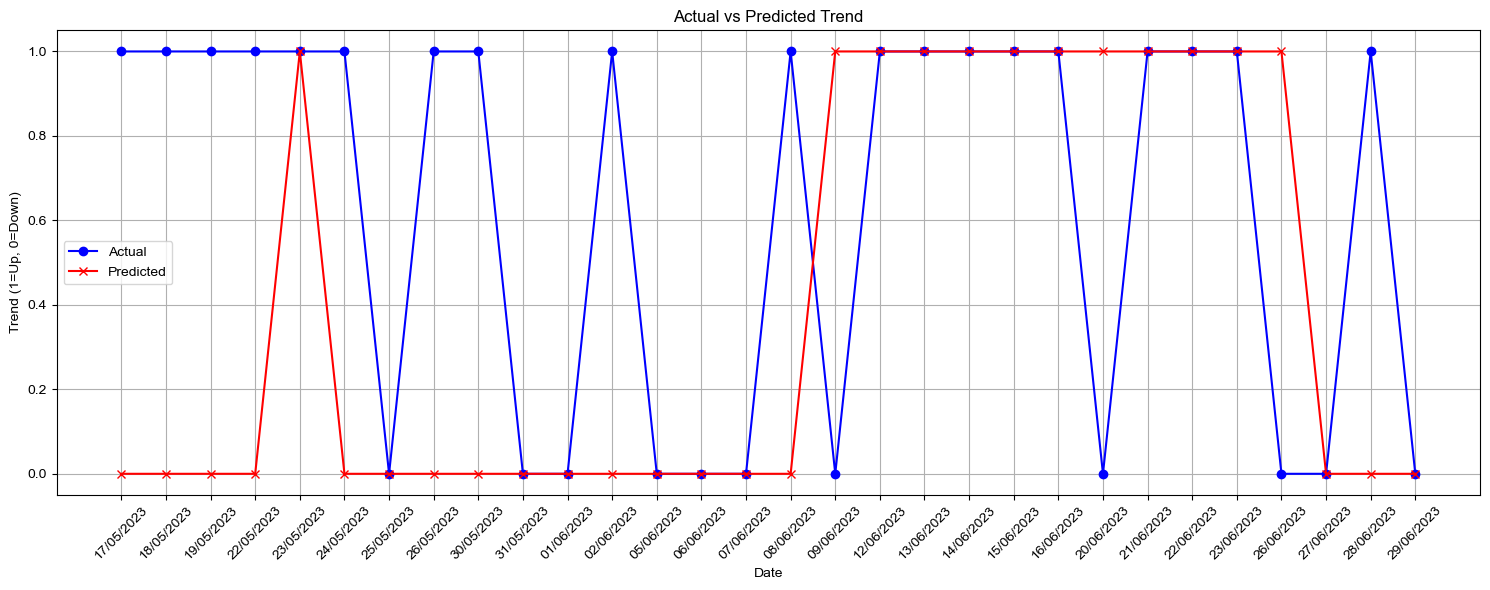

In [35]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('WBD_TechIndicators.csv')

df['Trend'] = df['Close'].shift(-1) < df['Close']
df['Trend'] = df['Trend'].astype(int)
df.dropna(inplace=True)

features = ['Open','Close', 'Adj Close','SMA', 'EMA', 'MACD', 'RSI', 'ATR', 'Percent_R', 'CCI',  '%D']

# Separate the last 30 days for testing
train_df = df.iloc[:-30]
test_df = df.iloc[-30:]

X_train = train_df[features]
y_train = train_df['Trend']

X_test = test_df[features]
y_test = test_df['Trend']

# Model training
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=10000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

# Plotting the graph
plt.figure(figsize=(15, 6))
dates = test_df['Date']

plt.plot(dates, y_test, color='blue', label='Actual', marker='o')
plt.plot(dates, y_pred, color='red', label='Predicted', marker='x')

plt.title('Actual vs Predicted Trend')
plt.xlabel('Date')
plt.ylabel('Trend (1=Up, 0=Down)')
plt.xticks(dates, rotation=45)  

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Logistic Regression applied on WBD News Sentiments

C:\Users\sheet\AppData\Local\Temp\ipykernel_19304\1048094791.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Actual Sentiment'].fillna(method='ffill', inplace=True)
C:\Users\sheet\AppData\Local\Temp\ipykernel_19304\1048094791.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Sentiment value'].fillna(method='ffill', inplace=True)


Accuracy:  0.5215384615384616
Precision: 0.75
Recall: 0.631578947368421
F1 score: 0.6857142857142857


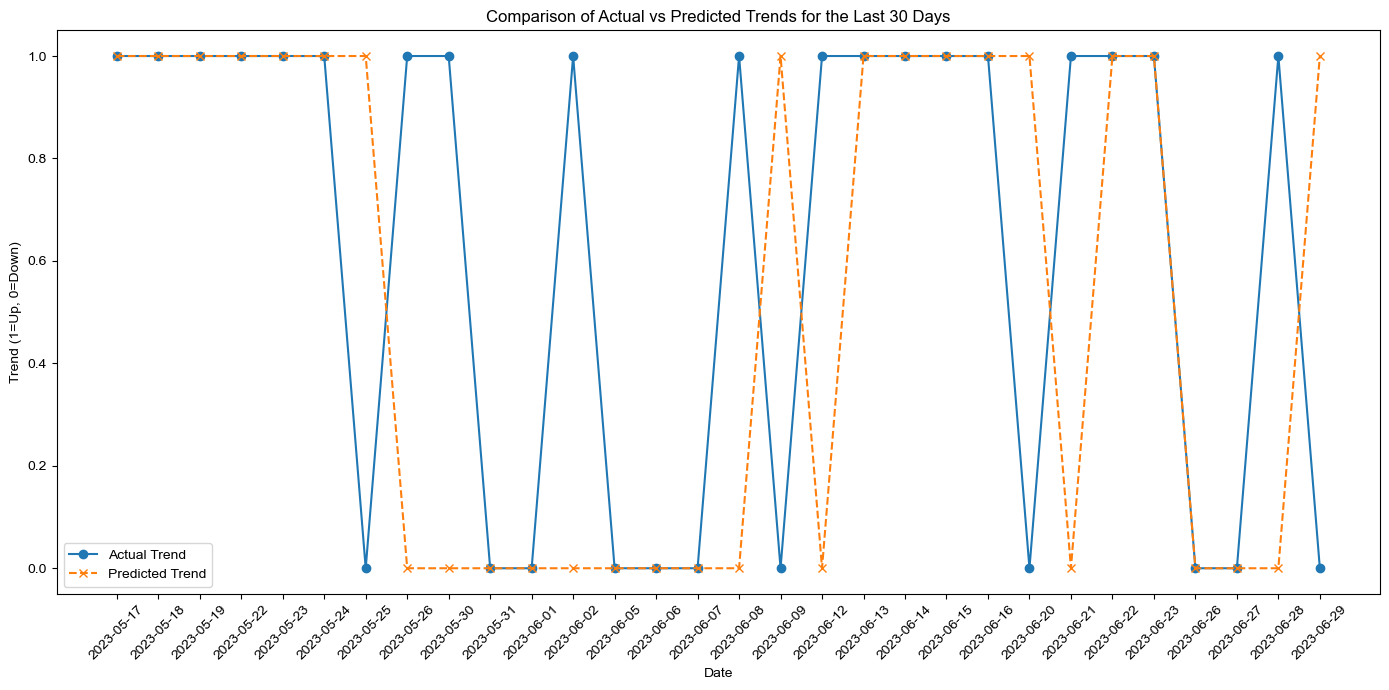

In [25]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Combined_WBD_filled.csv')

# Split the data into training and testing sets
train_df = df.iloc[:-30]
test_df = df.iloc[-30:]

# Remove rows with blank values in 'Actual Sentiment' and 'Sentiment value' for training set
train_df = train_df.dropna(subset=['Actual Sentiment', 'Sentiment value'])

# For the test set, replace the blank values using ffill
test_df['Actual Sentiment'].fillna(method='ffill', inplace=True)
test_df['Sentiment value'].fillna(method='ffill', inplace=True)


# Combine train and test dataframes back
df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

le = LabelEncoder()
df['Actual Sentiment'] = le.fit_transform(df['Actual Sentiment'])

# Generating Trend
df['Trend'] = (df['Close'].shift(-1) < df['Close']).astype(int)

# Features and target
features = ['Close','Open','ATR', 'SMA', 'EMA', '%K','MACD','ADX','CCI','ROC', 'Percent_R', '%D', 'Actual Sentiment', 'Sentiment value']
   

X = df[features].iloc[:-30]
y = df['Trend'].iloc[:-30]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model and Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=30)
model = LogisticRegression(max_iter=10000)
accuracies = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')

df.iloc[-30:] = df.iloc[-30:].fillna(method='ffill')

# Training and making predictions on the last 30 days
df.iloc[-30:] = df.iloc[-30:].fillna(method='bfill')

model.fit(X_scaled, y)
X_last_30 = df[features].iloc[-30:]
X_last_30_scaled = scaler.transform(X_last_30)
predictions_last_30 = model.predict(X_last_30_scaled)

# Extract actual trends for the last 30 days
actual_trends_last_30 = df['Trend'].tail(30)

# Metrics
print("Accuracy: ", accuracies.mean())
print("Precision:", precision_score(actual_trends_last_30, predictions_last_30))
print("Recall:", recall_score(actual_trends_last_30, predictions_last_30))
print("F1 score:", f1_score(actual_trends_last_30, predictions_last_30))


# Visualization
comparison_df = df.tail(30).copy()
comparison_df['Predicted_Trend'] = predictions_last_30

plt.figure(figsize=(14, 7))
plt.plot(comparison_df['Date'], comparison_df['Trend'], marker='o', label='Actual Trend')
plt.plot(comparison_df['Date'], comparison_df['Predicted_Trend'], marker='x', linestyle='--', label='Predicted Trend')
plt.title('Comparison of Actual vs Predicted Trends for the Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Trend (1=Up, 0=Down)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Prophet applied on WBD Base data

18:08:11 - cmdstanpy - INFO - Chain [1] start processing
18:08:11 - cmdstanpy - INFO - Chain [1] done processing


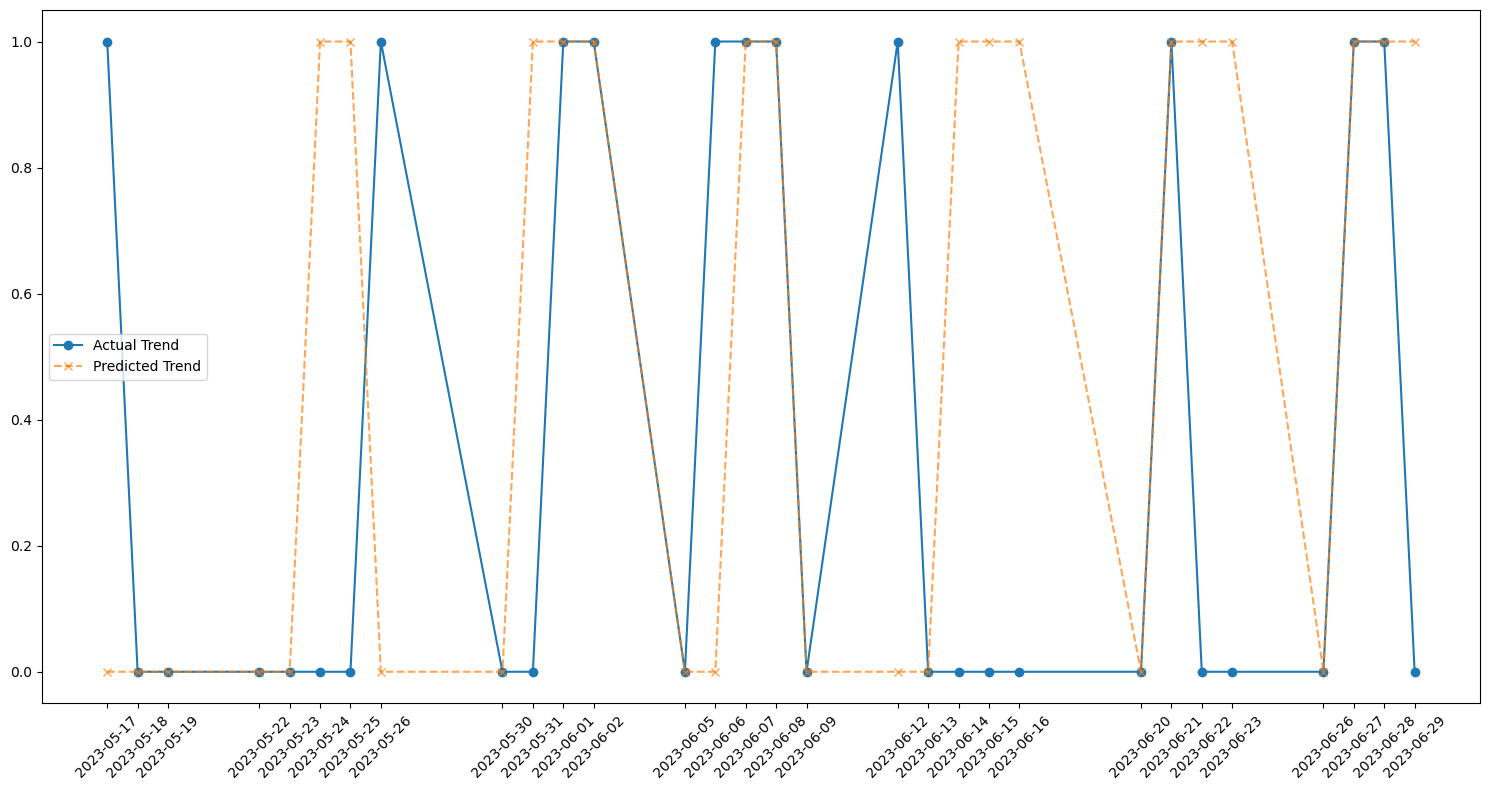

Accuracy: 0.5667
Precision: 0.4375
Recall: 0.6364
F1 Score: 0.5185


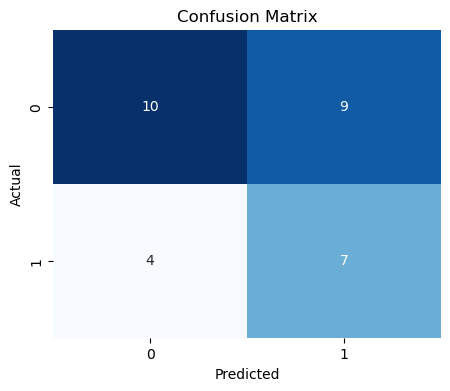

In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score

df = pd.read_csv('WBD.csv')

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Calculate trend: 1 for increasing and 0 for decreasing or no change
df['trend'] = (df['Close'].diff() > 0).astype(int)

# Splitting data
train = df.iloc[:-30].copy()
test = df.iloc[-30:].copy()

train.rename(columns={'Date': 'ds', 'trend': 'y'}, inplace=True)

model = Prophet(
    daily_seasonality=True, 
    yearly_seasonality=True, 
    weekly_seasonality=True, 
    changepoint_prior_scale=0.5, 
    seasonality_prior_scale=0.5
    
)

model.fit(train)

# Make predictions for the last 30 days
future = test[['Date']].rename(columns={'Date': 'ds'})
forecast = model.predict(future)
forecast['trend_pred'] = (forecast['yhat'].round() > 0).astype(int)
plt.figure(figsize=(15, 8))

plt.plot(test['Date'], test['trend'], 'o-', label='Actual Trend')

plt.plot(test['Date'], forecast['trend_pred'], 'x--', label='Predicted Trend', alpha=0.7)

plt.xticks(test['Date'], rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


# Calculate metrics
accuracy = accuracy_score(test['trend'], forecast['trend_pred'])
precision = precision_score(test['trend'], forecast['trend_pred'])
recall = recall_score(test['trend'], forecast['trend_pred'])
f1 = f1_score(test['trend'], forecast['trend_pred'])

# Print out the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

confusion = confusion_matrix(test['trend'], forecast['trend_pred'])

plt.figure(figsize=(5, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Prophet applied on WBD Technical Indicators

18:08:46 - cmdstanpy - INFO - Chain [1] start processing
18:08:46 - cmdstanpy - INFO - Chain [1] done processing


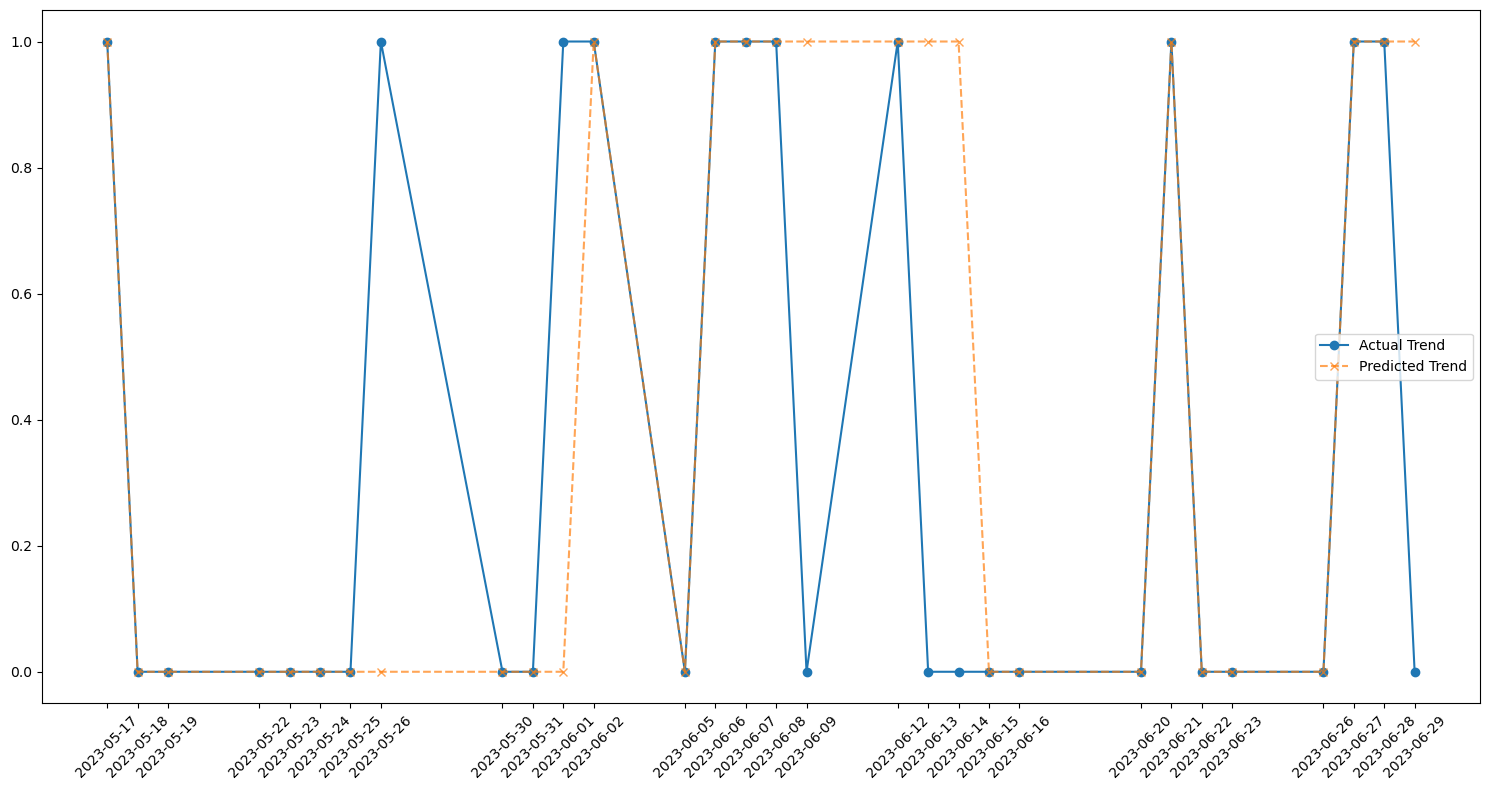

Accuracy: 0.8000
Precision: 0.6923
Recall: 0.8182
F1 Score: 0.7500


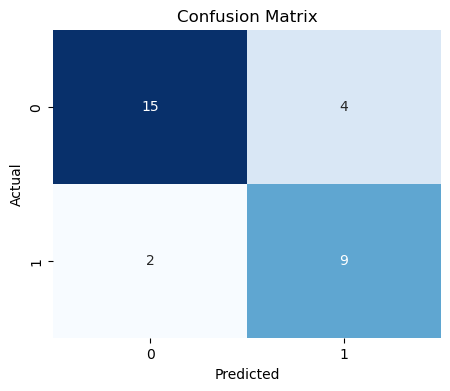

In [5]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('WBD_TechIndicators.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df['trend'] = (df['Close'].diff() > 0).astype(int)

# Splitting data
train = df.iloc[:-30].copy()
test = df.iloc[-30:].copy()

# Rename columns for Prophet
train.rename(columns={'Date': 'ds', 'trend': 'y'}, inplace=True)


# Initialize Prophet model
model = Prophet(
    daily_seasonality=True, 
    yearly_seasonality=True, 
    weekly_seasonality=True, 
    changepoint_prior_scale=0.1, 
    seasonality_prior_scale=0.5,
    interval_width=0.85
       
)

model.add_regressor('Close')
model.add_regressor('SMA')
model.add_regressor('EMA')
model.add_regressor('MACD')
model.add_regressor('Percent_R')
model.add_regressor('Signal_Line')
model.add_regressor('Open')
model.add_regressor('ADX')
model.add_regressor('OBV')

model.fit(train)


future = test[['Date','Close','SMA','EMA','MACD','Percent_R','Signal_Line','Open','ADX','OBV']].rename(columns={'Date': 'ds'})
forecast = model.predict(future)
forecast['trend_pred'] = (forecast['yhat'].round() > 0).astype(int)

# Plot actual vs predicted trend
plt.figure(figsize=(15, 8))
plt.plot(test['Date'], test['trend'], 'o-', label='Actual Trend')
plt.plot(test['Date'], forecast['trend_pred'], 'x--', label='Predicted Trend', alpha=0.7)
plt.xticks(test['Date'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate metrics
accuracy = accuracy_score(test['trend'], forecast['trend_pred'])
precision = precision_score(test['trend'], forecast['trend_pred'])
recall = recall_score(test['trend'], forecast['trend_pred'])
f1 = f1_score(test['trend'], forecast['trend_pred'])

# Print out the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

confusion = confusion_matrix(test['trend'], forecast['trend_pred'])

plt.figure(figsize=(5, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Prophet applied on WBD News Sentiments

18:09:53 - cmdstanpy - INFO - Chain [1] start processing
18:09:53 - cmdstanpy - INFO - Chain [1] done processing


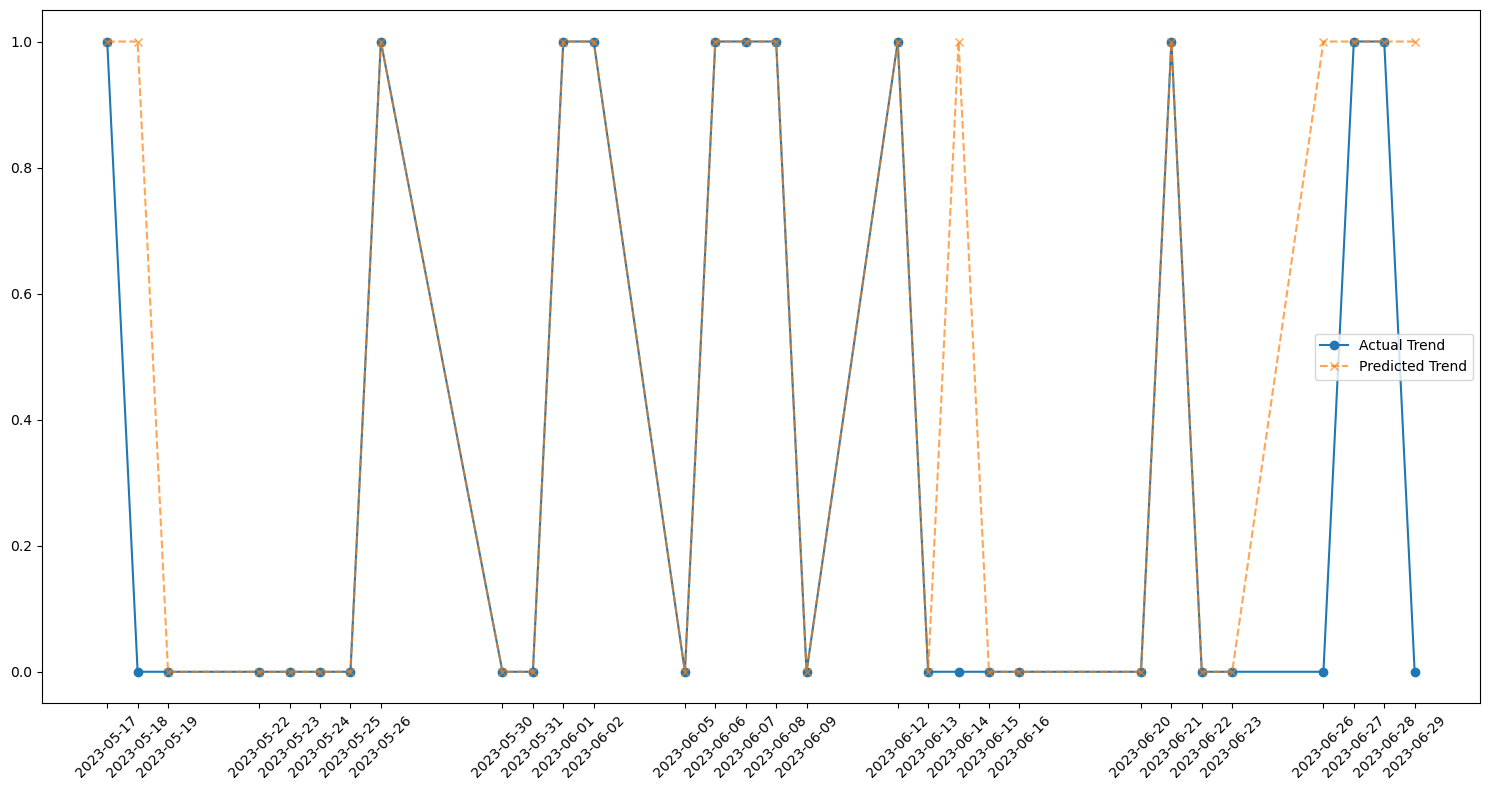

Accuracy: 0.8667
Precision: 0.7333
Recall: 1.0000
F1 Score: 0.8462


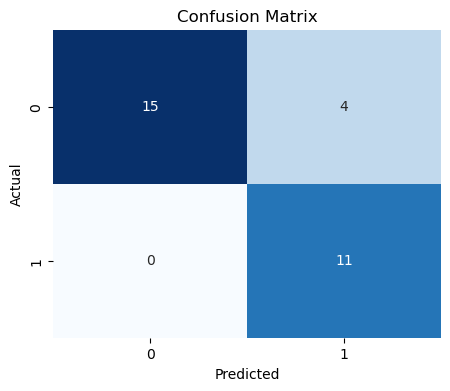

In [6]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('Combined_WBD_filled.csv')

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Calculate trend: 1 for increasing and 0 for decreasing or no change
df['trend'] = (df['Close'].diff() > 0).astype(int)

# Splitting data
train = df.iloc[:-30].copy()
test = df.iloc[-30:].copy()

# Drop rows with null values in 'Actual Sentiment' and 'Sentiment value' ONLY for train
train = train.dropna(subset=['Actual Sentiment', 'Sentiment value'])

# Rename columns for Prophet
train.rename(columns={'Date': 'ds', 'trend': 'y'}, inplace=True)


# Initialize Prophet model
model = Prophet(
    daily_seasonality=True, 
    yearly_seasonality=True, 
    weekly_seasonality=True, 
    changepoint_prior_scale=0.1, 
    seasonality_prior_scale=0.5,
    interval_width=0.85
       
)

sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
train['Actual Sentiment'] = train['Actual Sentiment'].map(sentiment_mapping)
test['Actual Sentiment'] = test['Actual Sentiment'].map(sentiment_mapping)


model.add_regressor('Actual Sentiment')
model.add_regressor('Sentiment value')
model.add_regressor('Close')
model.add_regressor('SMA')
model.add_regressor('EMA')
model.add_regressor('MACD')
model.add_regressor('Percent_R')
model.add_regressor('Signal_Line')
model.add_regressor('Open')
model.add_regressor('ADX')
model.add_regressor('OBV')
model.add_regressor('CCI')
model.add_regressor('RSI')
model.add_regressor('ROC')                             


model.fit(train)

# Interpolate NaN values for the 'Actual Sentiment' and 'Sentiment value' columns in the test set
test['Actual Sentiment'] = test['Actual Sentiment'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
test['Sentiment value'] = test['Sentiment value'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


# Make predictions for the last 30 days
future = test[['Date', 'Actual Sentiment', 'Sentiment value','RSI','ROC','Close','SMA','EMA','MACD','Percent_R','Signal_Line','Open','ADX','OBV','CCI']].rename(columns={'Date': 'ds'})
forecast = model.predict(future)
forecast['trend_pred'] = (forecast['yhat'].round() > 0).astype(int)

# Plot actual vs predicted trend
plt.figure(figsize=(15, 8))
plt.plot(test['Date'], test['trend'], 'o-', label='Actual Trend')
plt.plot(test['Date'], forecast['trend_pred'], 'x--', label='Predicted Trend', alpha=0.7)
plt.xticks(test['Date'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate metrics
accuracy = accuracy_score(test['trend'], forecast['trend_pred'])
precision = precision_score(test['trend'], forecast['trend_pred'])
recall = recall_score(test['trend'], forecast['trend_pred'])
f1 = f1_score(test['trend'], forecast['trend_pred'])

# Print out the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

confusion = confusion_matrix(test['trend'], forecast['trend_pred'])

plt.figure(figsize=(5, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
